In [34]:
import datetime

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yfin
import matplotlib.pyplot as plt
from scipy import stats
#yfin.pdr_override() #we need this to get data from Yahoo!Finance
#from pandas_datareader.famafrench import get_available_datasets

In [ ]:
# SECURITIES
# scenario 1: loan for a credit card (unsecured)
# scenario 2: loan for a house in California (collateral is the house)
# scenario 3: loan to a construction company (collateral is the building under construction, but not the land)
# scenario 4: snp500 index
# scenario 5: treasury bond (e.g. 30y)
# scenario 6: illiquid corporate bond of high quality company (choose a company)

In [ ]:
# DATASETS
# scenario 1: delinquency rates on credit cards https://fred.stlouisfed.org/series/DRCCLACBS
# scenario 2: average 30y mortgage rate https://fred.stlouisfed.org/series/MORTGAGE30US 
# and mortgage delinquency rate https://fred.stlouisfed.org/series/DRSFRMACBS
# and house price index for California https://fred.stlouisfed.org/series/CASTHPI
# scenario 3: building material prices https://fred.stlouisfed.org/series/PCU44414441
# scenario 4: publicly traded equity: snp500 (fred)
# scenario 5: treasury bond 30y yield (get from Yahoo?)
# scenario 6: https://fred.stlouisfed.org/series/DAAA <- proxy for high quality illiquid bond (fred)

In [ ]:
# IDEA
# WE NEED TO BUY A TREASURY BOND TO LEND IN SCENARIO 5. IT WILL BE RETURNED TO US LATER. IN THE MEANTIME ITS PRICE MOVED.
# IF ITS PRICE WENT DOWN (YIELD GOES UP), WE WILL LOSE MONEY. ON THE OTHER HAND, IF YIELD GOES UP, INTEREST RATES GO UP,
# AND SO LIKELY DELINQUENCY RATES ON CREDIT CARDS WILL GO UP (WE NEED TO PROVE THIS WITH A SCATTER PLOT AND CORRELATION VALUE).
# BUT THIS ALSO MEANS WE WILL HAVE HIGHER CREDIT RISK IN SCENARIO 1. AT THE SAME TIME, AS RATES RISE, MORTGAGE DELINQUENCY RATES
# MIGHT GO UP AND HOUSE PRICES DROP, WHICH MAKES THE COLLATERAL IN SCENARIO 2 GO DOWN AND CREDIT RISK GO UP. SO THE PROBLEMS ARE SNOWBALLING.
# IN SCENARIO 6 WE ARE LESS WORRIED BECAUSE DUE TO THE ILLIQUID NATURE OF THE BOND, WE WILL LIKELY CHOOSE NOT LIQUIDATE IT AND TO WAIT
# UNTIL ITS MATURITY AND COLLECT THE COUPONS. IN SCENARIO 4, SNP500 INDEX MIGHT GO DOWN WITH INTEREST RATES (TO BE CHECKED), AND IT
# WOULD BE INTERESTING TO ANALYSE ITS DISTRIBUTION OF RETURNS WITH A HISTORGRAM AND HOW FAR IT IS FROM A NORMAL DISTRIBUTION (CALCULATE SKEW AND KURT).
# I'M NOT SURE ABOUT SCENARIO 3, BUT I WAS THINKING THAT BUILDING MATERIALS GOING UP IN PRICE IS BAD AS IT IS LESS LIKELY THE
# CONSTRUCTION COMPANY WILL SUCCESSFULLY FINISH THE BUILDING.


In [60]:
# Renaming the data for easier interpretation
column_name_mapping = {
    'DRCCLACBS': 'CreditCardDelinq', 
    'MORTGAGE30US': 'AvgMortgageRate',
    'DRSFRMACBS': 'MortgageDelinq',
    'CASTHPI': 'HousePxIdx_CA',
    'PCU44414441': 'BuildingMaterialPx',
    'sp500': 'SP500',
    'DAAA': 'InvestmentBondYield'
}

In [63]:
end = datetime.date(2024,1,4)#datetime.date(2021, 11, 20)
start = end - datetime.timedelta(365 * 10)
df = web.DataReader(['DRCCLACBS', 'MORTGAGE30US', 'DRSFRMACBS', 'CASTHPI', 'PCU44414441', 'sp500', 'DAAA'], 'fred', start, end)
df.rename(columns=column_name_mapping, inplace=True)
df.head()

,CreditCardDelinq,AvgMortgageRate,MortgageDelinq,HousePxIdx_CA,BuildingMaterialPx,SP500,InvestmentBondYield
DATE,,,,,,,
2014-01-06,NaN,NaN,NaN,NaN,NaN,1826.77,4.53
2014-01-07,NaN,NaN,NaN,NaN,NaN,1837.88,4.51
2014-01-08,NaN,NaN,NaN,NaN,NaN,1837.49,4.53
2014-01-09,NaN,4.51,NaN,NaN,NaN,1838.13,4.56
2014-01-10,NaN,NaN,NaN,NaN,NaN,1842.37,4.50


We plot all the time series of each for general qualitative analysis

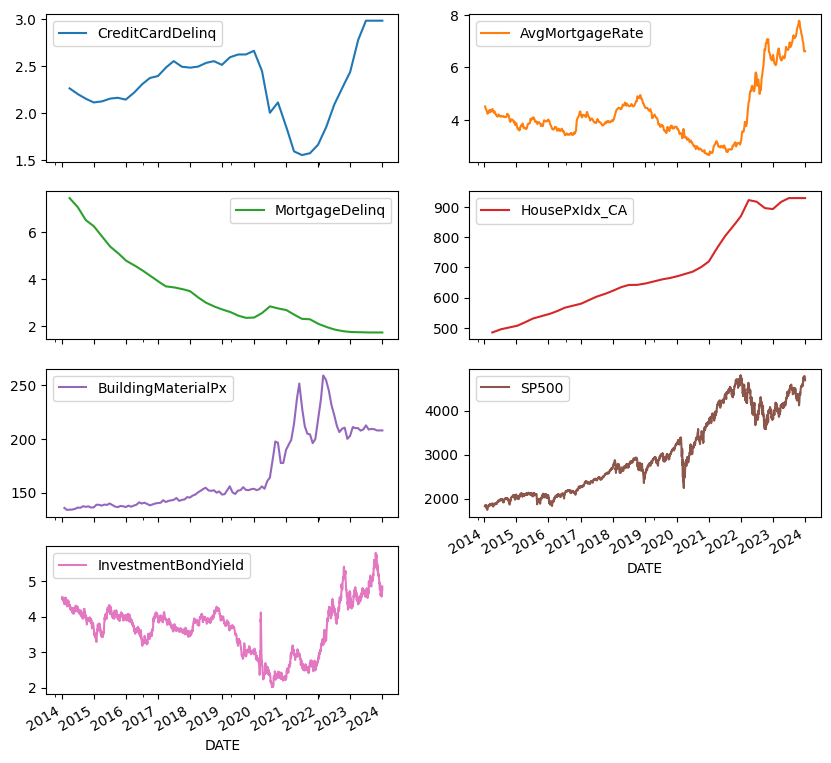

In [62]:
#interpolate on the dates just for plotting
df_interpolated = df.interpolate('index')
df_interpolated.plot(subplots=True, layout=(4,2), figsize=(10,10));